#Beijing Multi-Site Air-Quality Analysis#

**Importing necessary libraries**

In [42]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
from sklearn import preprocessing

**Reading csv data as Dataframe using pandas**

In [33]:
df1 = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df2 = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
df3 = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
df4 = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
df5 = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
df6 = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
df7 = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
df8 = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df9 = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
df10 = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
df11 = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
df12 = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")

**Merging 12 individual dataframes into single dataframe using Pandas**

In [34]:
frames = [df1, df2, df3,df4, df5, df6,df7, df8, df9,df10,df11, df12]
data = pd.concat(frames)

**Concise summary of the dataframe**

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


**Identifying the data types of all the columns in the dataframe**

In [ ]:
data.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

**Using describe function**

**The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data**

In [ ]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Renaming the coulmn Names/Labels**

**This approach is done for better understanding which improves the readability of the data set.**

In [ ]:
data=data.rename(columns ={'wd':'wind_direction','DEWP':'dew_point_temp','TEMP':'temp','RAIN':'rain','WSPM':'wind_speed','PRES':'pressure'})

**Replacing the null values with median of the column**

**Analysis of a dataset which contains missing values or NAN data will result in prediction with high error and very less accuracy. Hence, null data entities are found out and are replaced by the mean/median value of the respective attribute values.**

In [ ]:
data.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

**In this dataset, the percent of data missing is higher for the 6 columnns.Imputing the median values to the missing values as an estimate of the missing value.**

In [ ]:
data['PM10'].fillna(data['PM10'].median(), inplace=True)
data['PM2.5'].fillna(data['PM2.5'].median(), inplace=True)
data['SO2'].fillna(data['SO2'].median(), inplace=True)
data['CO'].fillna(data['CO'].median(), inplace=True)
data['O3'].fillna(data['O3'].median(), inplace=True)

**Using head and tail function, identifying the first and last rows of the data frame**

In [37]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [38]:
data.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
35063,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


**Data Visualizations**

**POINT PLOT**

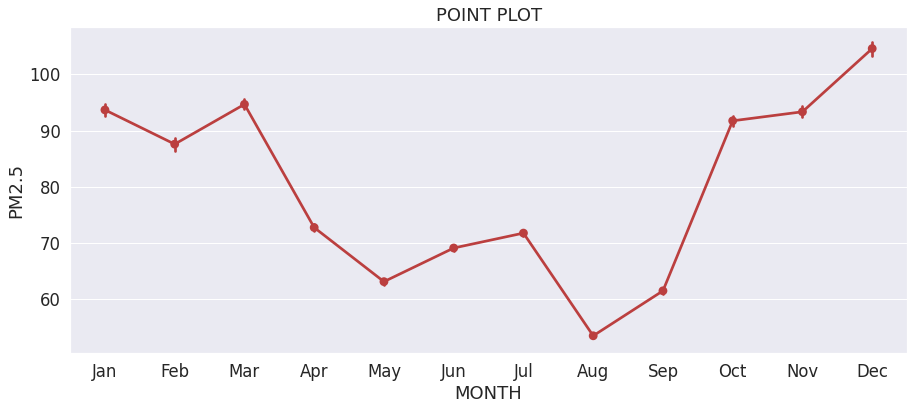

In [43]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = sns.pointplot(x="month", y="PM2.5", data=data,color="#bb3f3f").set_xticklabels(labels)
plt.xlabel("MONTH")
plt.ylabel("PM2.5")
plt.title("POINT PLOT")
plt.show(fig)

**Using Point plot, we can say that the PM2.5 levels hit all time low in aug and all time high in december in these 5 years from 2013 to 2017**

**BOX PLOT**

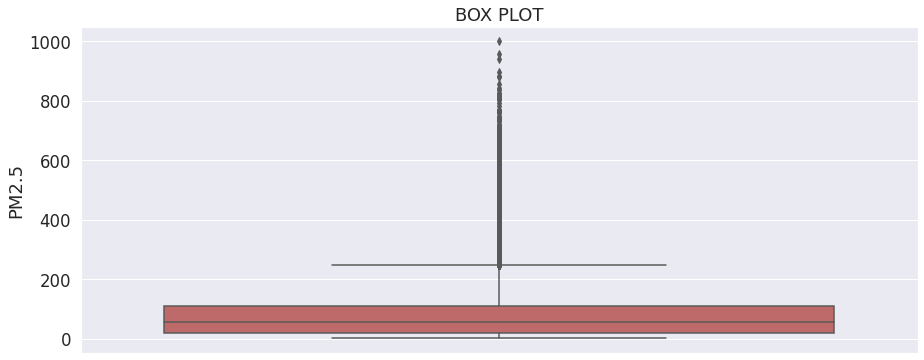

In [44]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
fig1=sns.boxplot(y=df["PM2.5"],color="#CD5C5C")
plt.title("BOX PLOT")
plt.show(fig1)

**From the below box plot, we can observe that almost all the stations have lower PM2.5 values and the 25 to 75 percentile ranges from 25 to 150.Also, there are many outliers. The distribution is right skewed as we can see there are many values to the right and median to the left.**

**DENSITY PLOT**

Text(0.5, 1.0, 'Density plot of the target variable')

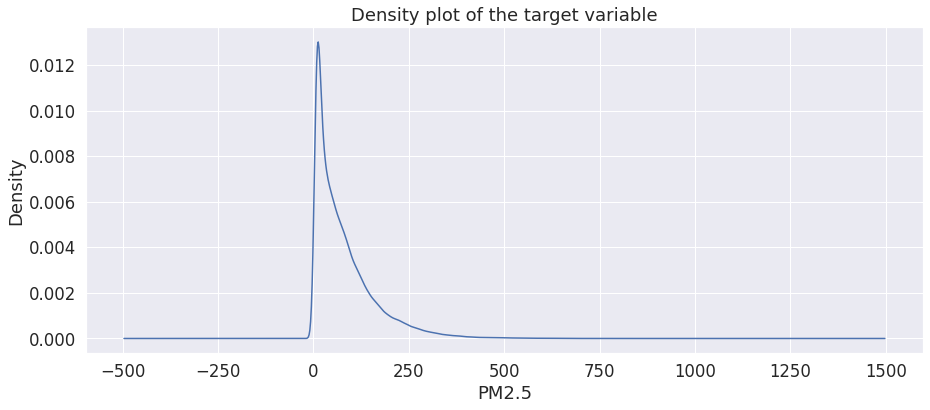

In [66]:
#checking the distribution
#f
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
fig10=data['PM2.5'].plot.density()
plt.xlabel('PM2.5')
plt.title("Density plot of the target variable")

**HISTOGRAM PLOT**

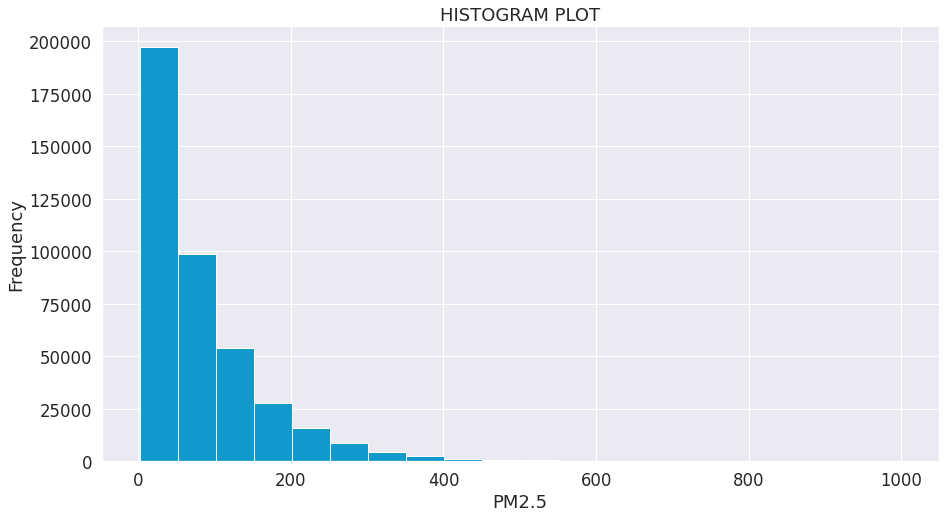

In [68]:
plt.figure(figsize=(15,6))
fig3=data['PM2.5'].hist(bins=20,figsize=(15,8),color="#1199CC")
plt.title("HISTOGRAM PLOT")
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show(fig3)

**The distribution of the target variable is right skewed as the right tail contains more values. More than 60% of the dataset values contain in the range of 0 to 200.**

**CORRELATION MATRIX**

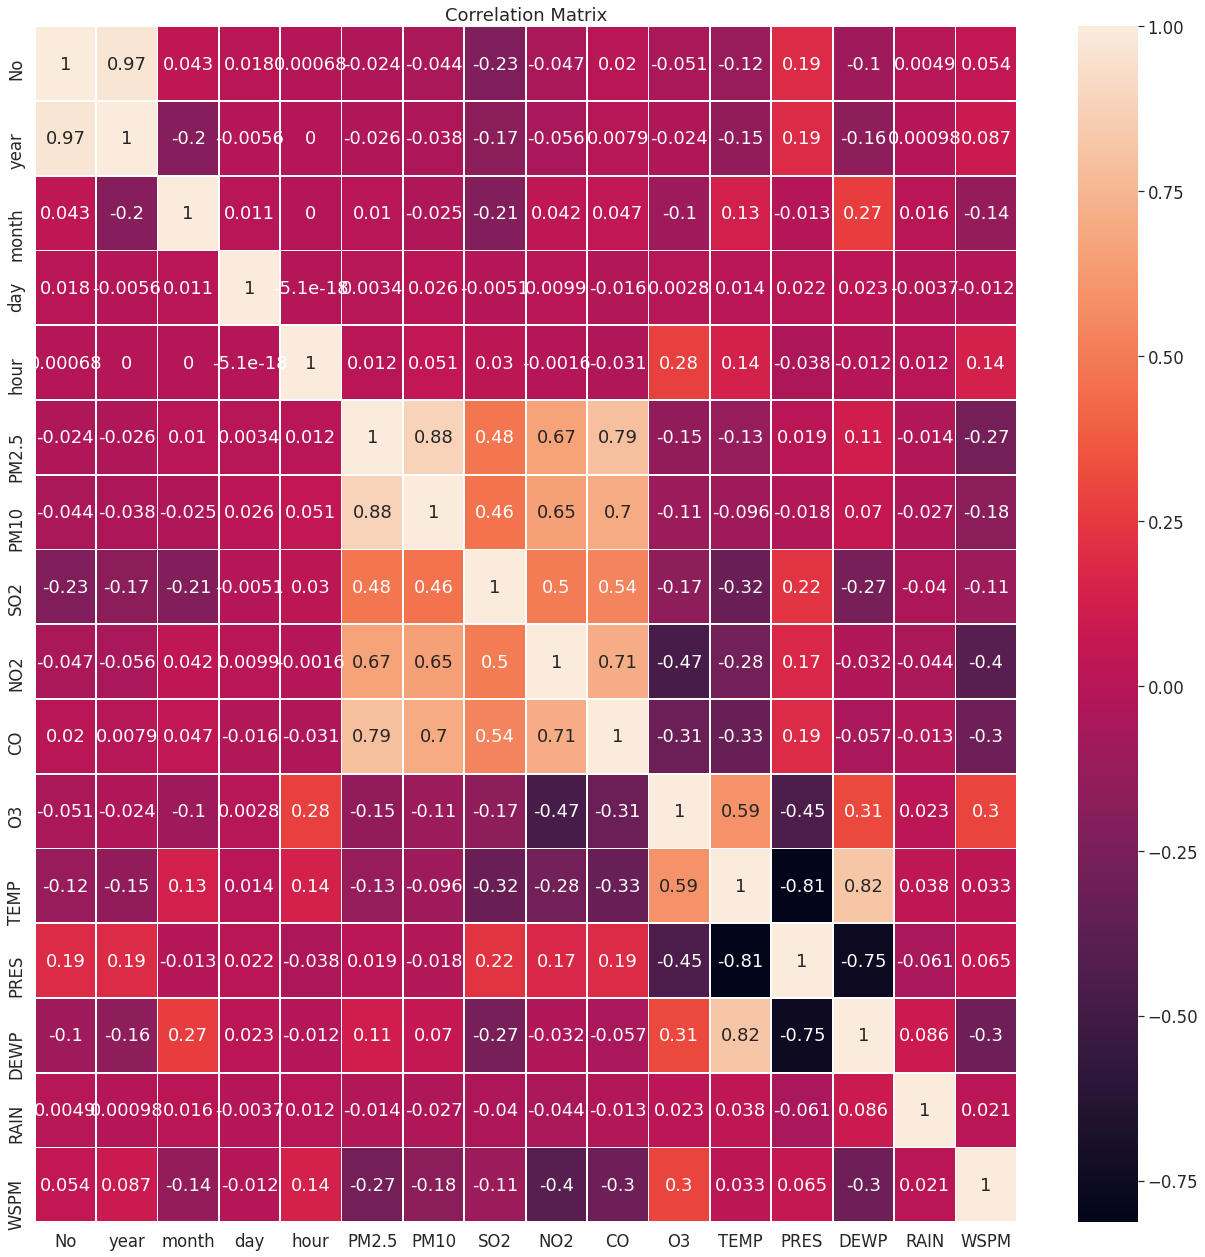

In [72]:
plt.figure(figsize=(22, 22))
plt.title('Correlation Matrix')
sns.heatmap(data.corr(), annot=True, linewidth = 0.75)
plt.show()

**Temp is highly correlated with pres and dew_point_temp as the correlation coefficient is more than 0.8.
PM10 is highly correlated with target variable PM2.5 as the correlation coefficient is 0.88.**

**YEAR WISE PM2.5 LEVEL**

Text(0.5, 1.0, 'Year Wise PM2.5 Level')

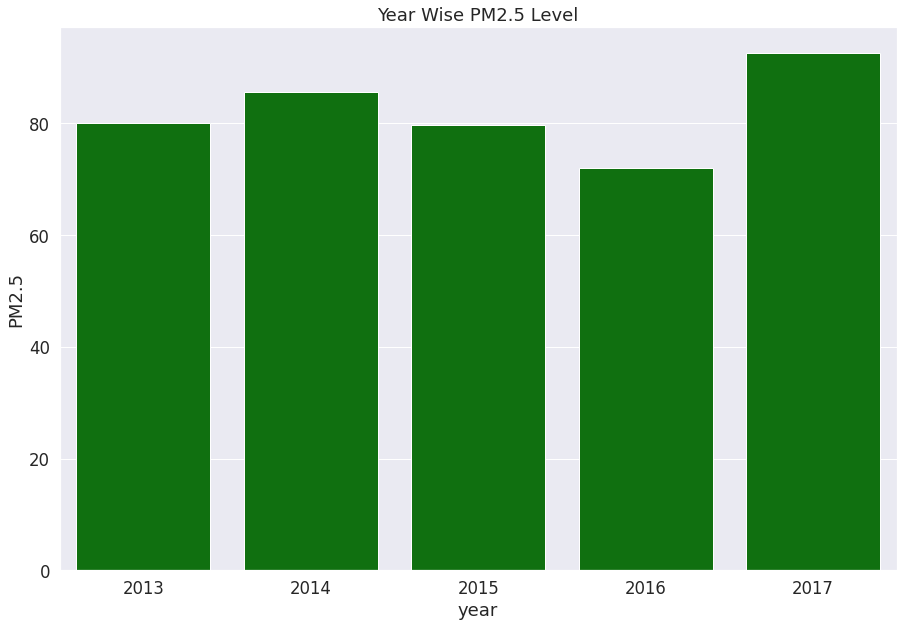

In [104]:
df = data[['PM2.5','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='year', y='PM2.5', data=df, color='green')

plt.title('Year Wise PM2.5 Level')

**Highest PM2.5 levels are observed for the year of 2017 and the least PM2.5 levels recorded are in 2016.**

**HIGHEST HOUR PM2.5 LEVEL**

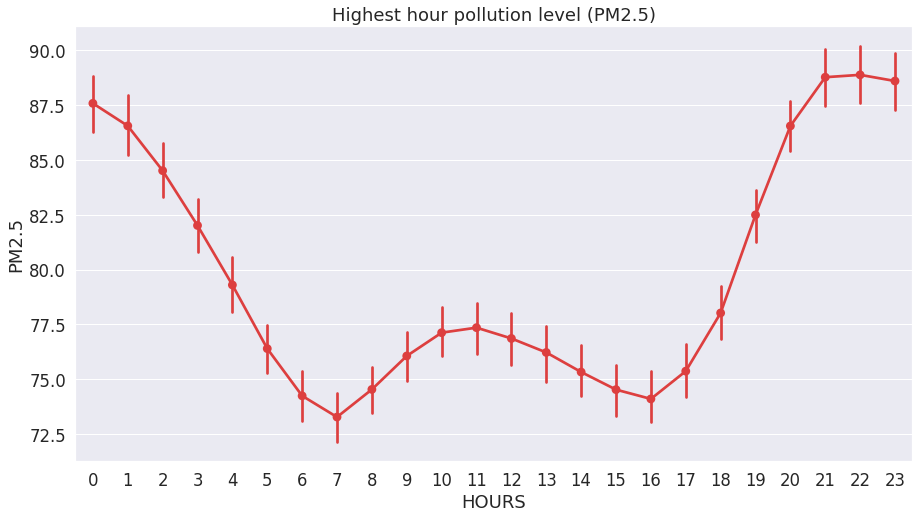

In [47]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
fig5=sns.pointplot(x='hour',y='PM2.5',data=data,color="#dd3f3f")
plt.xlabel("HOURS")
plt.ylabel("PM2.5")
plt.title("Highest hour pollution level (PM2.5)")
plt.show(fig5)

**For all the years 2013-2017, the change in levels of PM2.5 are very high in the evening. PM2.5 level are least in the morning at 7am. Highest pollution hour is at 21:00hrs**